<a href="https://colab.research.google.com/github/tejpal123456789/Natural-Language-Processing/blob/main/Diasaster_twitter_ananlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Natural language processing dataset/disaster.csv')
data.head() 

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
data.shape

(7613, 5)

In [ ]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
print(data.text)

0          our deed reason earthquake may allah forgive u
1                   forest fire near la ronge sask canada
2       all resident asked shelter place notified offi...
3       13000 people receive wildfire evacuation order...
4       just got sent photo ruby alaska smoke wildfire...
                              ...                        
7608    two giant crane holding bridge collapse nearby...
7609    ariaahrary thetawniest the control wild fire c...
7610                    m194 0104 utc5km s volcano hawaii
7611    police investigating ebike collided car little...
7612    the latest more home razed northern california...
Name: text, Length: 7613, dtype: object


In [ ]:
data['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
damage                   41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


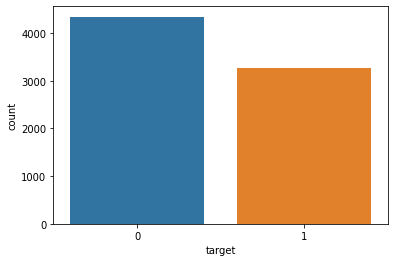

In [ ]:
sns.countplot(data['target'])

In [ ]:
def plot_target_based_feature(feature):
    x1=data[data['target']==1][feature]
    x2=data[data['target']==0][feature]
    plt.figure(1,figsize=(16,8))
    _=plt.hist(x2,alpha=0.5,color='grey',bins=20)
    _=plt.hist(x1,alpha=0.7,color='red',bins=20)
    return _


In [ ]:
data['word count']=data['text'].apply(lambda x: len(x.split()))
data.tail()


,id,keyword,location,text,target,word count
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1,13


In [ ]:
data[data['target']==0]['word count'].head()

15    3
16    3
17    3
18    5
19    3
Name: word count, dtype: int64

(array([ 17.,  24.,  91.,  83., 133., 292., 221., 404., 207., 211., 434.,
        277., 377., 133., 126., 146.,  42.,  41.,   6.,   6.]),
 array([ 2. ,  3.4,  4.8,  6.2,  7.6,  9. , 10.4, 11.8, 13.2, 14.6, 16. ,
        17.4, 18.8, 20.2, 21.6, 23. , 24.4, 25.8, 27.2, 28.6, 30. ]),
 <a list of 20 Patch objects>)

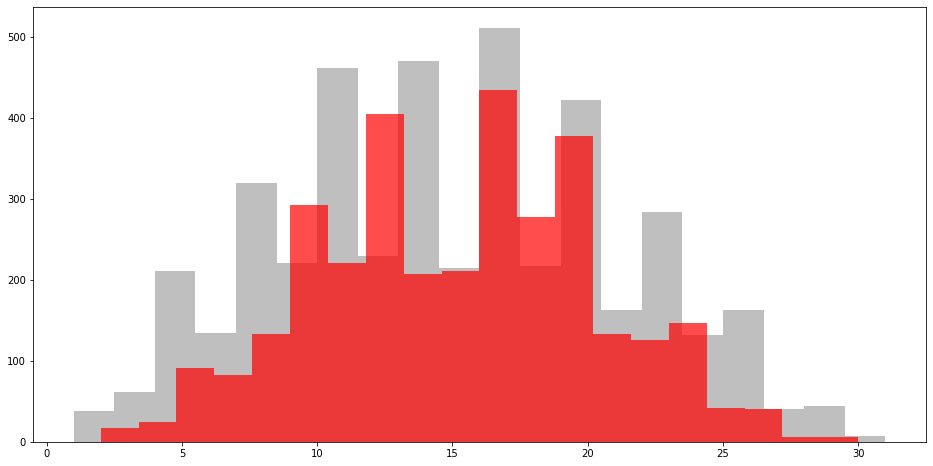

In [ ]:
plot_target_based_feature('word count')

(array([  7.,  24.,  28.,  26.,  49.,  69.,  57., 100., 121., 181., 210.,
        238., 219., 155., 222., 205., 215., 721., 409.,  15.]),
 array([ 14.  ,  20.85,  27.7 ,  34.55,  41.4 ,  48.25,  55.1 ,  61.95,
         68.8 ,  75.65,  82.5 ,  89.35,  96.2 , 103.05, 109.9 , 116.75,
        123.6 , 130.45, 137.3 , 144.15, 151.  ]),
 <a list of 20 Patch objects>)

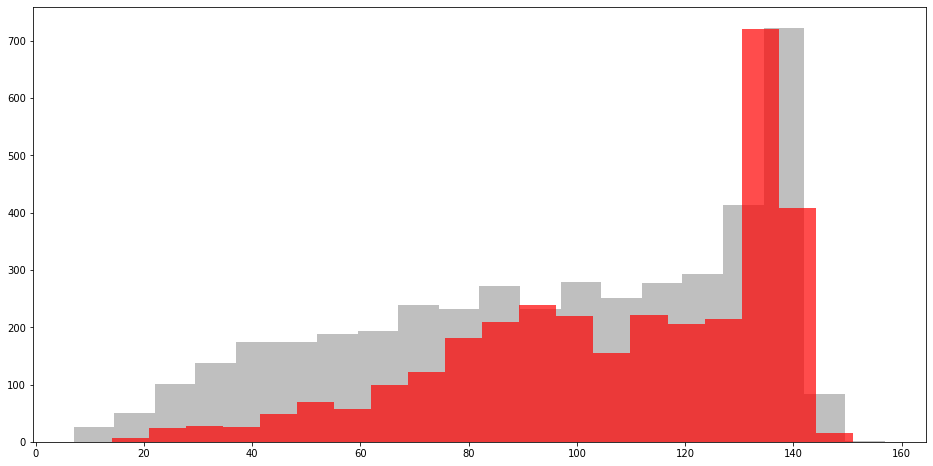

In [ ]:
data['text len']=data['text'].apply(lambda x:len(x))
plot_target_based_feature('text len')

(array([ 17.,  25.,  39., 134., 139., 147., 386., 202., 278., 229., 408.,
        261., 278., 379., 132.,  87.,  92.,  23.,   9.,   6.]),
 array([ 2. ,  3.3,  4.6,  5.9,  7.2,  8.5,  9.8, 11.1, 12.4, 13.7, 15. ,
        16.3, 17.6, 18.9, 20.2, 21.5, 22.8, 24.1, 25.4, 26.7, 28. ]),
 <a list of 20 Patch objects>)

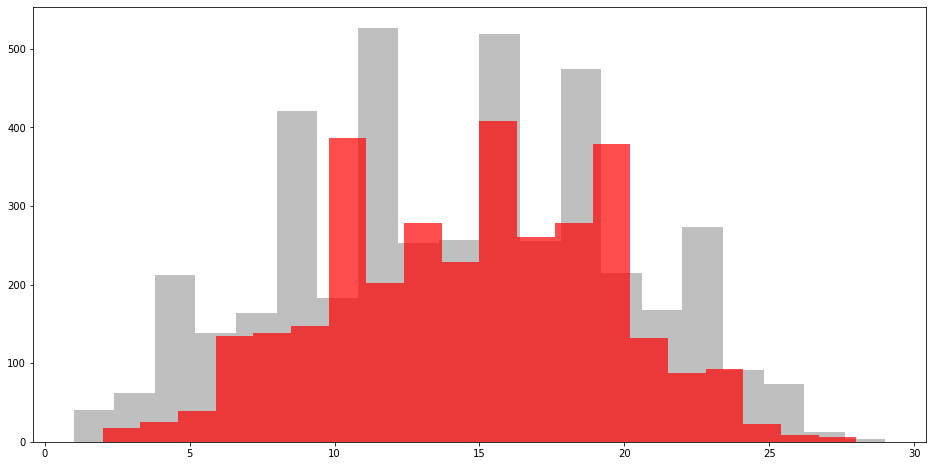

In [ ]:
data['unique_words']=data['text'].apply(lambda x: len(set(str(x).split())))
plot_target_based_feature('unique_words')

In [ ]:
def mean_word_length(x):
    y=x.split()
    wordlen=0
    for word in y:
        wordlen=wordlen+len(word)

    return wordlen/len(y)
data['mean_word_length'] =data['text'].apply(lambda x: mean_word_length(x))
data.head()       

,id,keyword,location,text,target,word count,text len,unique_words,mean_word_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,13,4.384615
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,7,4.571429
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133,20,5.090909
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65,8,7.125000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88,15,4.500000


(array([ 49., 282., 471., 758., 745., 447., 290., 128.,  52.,  25.,  11.,
          6.,   0.,   1.,   1.,   1.,   3.,   0.,   0.,   1.]),
 array([ 3.        ,  3.81666667,  4.63333333,  5.45      ,  6.26666667,
         7.08333333,  7.9       ,  8.71666667,  9.53333333, 10.35      ,
        11.16666667, 11.98333333, 12.8       , 13.61666667, 14.43333333,
        15.25      , 16.06666667, 16.88333333, 17.7       , 18.51666667,
        19.33333333]),
 <a list of 20 Patch objects>)

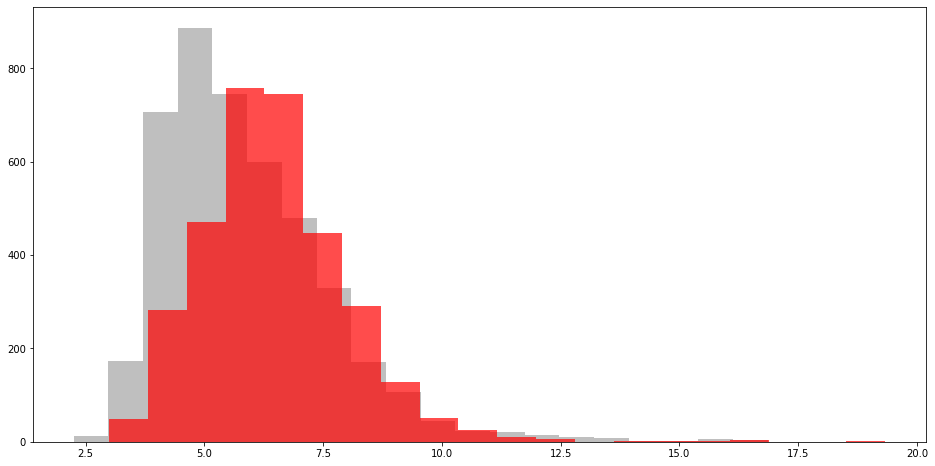

In [ ]:
plot_target_based_feature('mean_word_length')

In [ ]:
import string

(array([229., 156., 314., 374., 379., 559., 270., 274., 366., 110.,  73.,
         86.,  12.,  14.,  25.,   4.,   1.,  19.,   4.,   2.]),
 array([ 0.  ,  1.35,  2.7 ,  4.05,  5.4 ,  6.75,  8.1 ,  9.45, 10.8 ,
        12.15, 13.5 , 14.85, 16.2 , 17.55, 18.9 , 20.25, 21.6 , 22.95,
        24.3 , 25.65, 27.  ]),
 <a list of 20 Patch objects>)

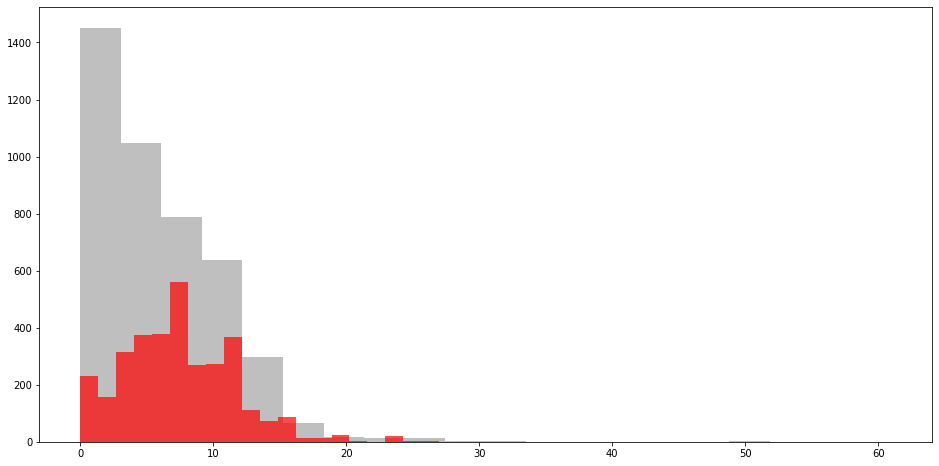

In [ ]:
data['number of punctuations']=data['text'].apply(lambda x: len([y for y in x if y in string.punctuation]))
data.head()
plot_target_based_feature('number of punctuations')

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
x='my anme ; ! is tej%jpal # kumawat'
print(len([y for y in x if y in string.punctuation]))

4


Ngrams


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
wnl=WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def generate_ngrams(text,ngram=1):
    tokens=text.split()
    token=[t.lower() for t in tokens if not t in set(stopwords.words('english'))]

    z=zip(*[token[i:] for i in range(ngram)])
    ngrams=[' '.join(ngram) for ngram in z]
    return ngrams




In [ ]:
x='My name is tejpal kumawat'
generate_ngrams(x)

['my', 'name', 'tejpal', 'kumawat']

In [ ]:
from collections import defaultdict
disaster_ngram=defaultdict(int)
nondisaster_ngram=defaultdict(int)

In [ ]:
for text in data[data['target']==1].text:
    for word in generate_ngrams(text):
        disaster_ngram[word]+=1

for text in data[data['target']==0].text:
    for word in generate_ngrams(text):
        nondisaster_ngram[word]+=1

In [ ]:
 #disaster_ngram
(disaster_ngram.items())


dict_items([('our', 16), ('deeds', 1), ('reason', 7), ('#earthquake', 19), ('may', 49), ('allah', 4), ('forgive', 1), ('us', 40), ('forest', 45), ('fire', 151), ('near', 47), ('la', 17), ('ronge', 1), ('sask.', 1), ('canada', 4), ('all', 20), ('residents', 7), ('asked', 1), ("'shelter", 1), ("place'", 1), ('notified', 1), ('officers.', 1), ('no', 31), ('evacuation', 38), ('shelter', 5), ('place', 12), ('orders', 9), ('expected', 9), ('13,000', 1), ('people', 93), ('receive', 2), ('#wildfires', 5), ('california', 88), ('just', 19), ('got', 29), ('sent', 4), ('photo', 7), ('ruby', 1), ('#alaska', 1), ('smoke', 11), ('pours', 1), ('school', 29), ('#rockyfire', 4), ('update', 8), ('=>', 1), ('hwy.', 4), ('20', 9), ('closed', 15), ('directions', 1), ('due', 24), ('lake', 8), ('county', 26), ('-', 389), ('#cafire', 2), ('#flood', 4), ('#disaster', 6), ('heavy', 18), ('rain', 22), ('causes', 9), ('flash', 17), ('flooding', 31), ('streets', 2), ('manitou,', 1), ('colorado', 9), ('springs', 3),

In [ ]:
word, count = zip(*disaster_ngram.items()) 
print(word)
print(count)

('our', 'deeds', 'reason', '#earthquake', 'may', 'allah', 'forgive', 'us', 'forest', 'fire', 'near', 'la', 'ronge', 'sask.', 'canada', 'all', 'residents', 'asked', "'shelter", "place'", 'notified', 'officers.', 'no', 'evacuation', 'shelter', 'place', 'orders', 'expected', '13,000', 'people', 'receive', '#wildfires', 'california', 'just', 'got', 'sent', 'photo', 'ruby', '#alaska', 'smoke', 'pours', 'school', '#rockyfire', 'update', '=>', 'hwy.', '20', 'closed', 'directions', 'due', 'lake', 'county', '-', '#cafire', '#flood', '#disaster', 'heavy', 'rain', 'causes', 'flash', 'flooding', 'streets', 'manitou,', 'colorado', 'springs', 'areas', "i'm", 'top', 'hill', 'i', 'see', 'woods...', "there's", 'emergency', 'happening', 'building', 'across', 'street', 'afraid', 'tornado', 'coming', 'area...', 'three', 'died', 'heat', 'wave', 'far', 'haha', 'south', 'tampa', 'getting', 'flooded', 'hah-', 'wait', 'a', 'second', 'live', 'in', 'what', 'am', 'gonna', 'do', 'fvck', '#flooding', '#raining', '#

In [ ]:
zip_iterator = zip(word, count)


a_dictionary = list(zip_iterator)
print(a_dictionary)

[('our', 16), ('deeds', 1), ('reason', 7), ('#earthquake', 19), ('may', 49), ('allah', 4), ('forgive', 1), ('us', 40), ('forest', 45), ('fire', 151), ('near', 47), ('la', 17), ('ronge', 1), ('sask.', 1), ('canada', 4), ('all', 20), ('residents', 7), ('asked', 1), ("'shelter", 1), ("place'", 1), ('notified', 1), ('officers.', 1), ('no', 31), ('evacuation', 38), ('shelter', 5), ('place', 12), ('orders', 9), ('expected', 9), ('13,000', 1), ('people', 93), ('receive', 2), ('#wildfires', 5), ('california', 88), ('just', 19), ('got', 29), ('sent', 4), ('photo', 7), ('ruby', 1), ('#alaska', 1), ('smoke', 11), ('pours', 1), ('school', 29), ('#rockyfire', 4), ('update', 8), ('=>', 1), ('hwy.', 4), ('20', 9), ('closed', 15), ('directions', 1), ('due', 24), ('lake', 8), ('county', 26), ('-', 389), ('#cafire', 2), ('#flood', 4), ('#disaster', 6), ('heavy', 18), ('rain', 22), ('causes', 9), ('flash', 17), ('flooding', 31), ('streets', 2), ('manitou,', 1), ('colorado', 9), ('springs', 3), ('areas', 

In [ ]:
dicti={'name':[word],
       'count':[count]}
#dicti       

In [ ]:
disaster_ngram_df=pd.DataFrame(dicti)
disaster_ngram_df.head()

,name,count
0,"(our, deeds, reason, #earthquake, may, allah, ...","(16, 1, 7, 19, 49, 4, 1, 40, 45, 151, 47, 17, ..."


In [ ]:
print(disaster_ngram.values())

dict_values([16, 1, 7, 19, 49, 4, 1, 40, 45, 151, 47, 17, 1, 1, 4, 20, 7, 1, 1, 1, 1, 1, 31, 38, 5, 12, 9, 9, 1, 93, 2, 5, 88, 19, 29, 4, 7, 1, 1, 11, 1, 29, 4, 8, 1, 4, 9, 15, 1, 24, 8, 26, 389, 2, 4, 6, 18, 22, 9, 17, 31, 2, 1, 9, 3, 7, 42, 13, 5, 259, 23, 1, 15, 66, 5, 16, 13, 18, 3, 21, 14, 2, 19, 21, 31, 21, 14, 4, 20, 2, 18, 4, 1, 2, 167, 11, 26, 107, 26, 7, 11, 7, 1, 3, 1, 2, 1, 1, 5, 1, 3, 7, 13, 2, 2, 10, 1, 2, 25, 26, 3, 1, 51, 65, 6, 1, 3, 3, 11, 1, 1, 9, 1, 18, 22, 1, 1, 2, 8, 2, 1, 1, 1, 3, 20, 71, 14, 1, 4, 3, 10, 6, 15, 1, 94, 1, 1, 25, 19, 2, 8, 5, 4, 1, 2, 45, 17, 1, 34, 1, 5, 66, 4, 50, 1, 7, 1, 1, 8, 6, 1, 15, 4, 22, 1, 1, 1, 1, 2, 6, 9, 1, 1, 6, 1, 1, 29, 31, 1, 1, 1, 11, 4, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 2, 62, 10, 1, 1, 1, 1, 1, 1, 12, 1, 50, 1, 4, 1, 16, 10, 1, 2, 2, 1, 13, 3, 5, 1, 1, 2, 14, 8, 2, 1, 3, 1, 13, 3, 11, 1, 1, 15, 1, 5, 1, 1, 23, 1, 1, 1, 2, 4, 5, 3, 8, 2, 2, 1, 2, 2, 34, 12, 1, 1, 5, 1, 1, 1, 32, 1, 1, 8, 1, 4, 2, 2, 11, 14, 9, 1, 2, 3, 1, 6, 1, 

In [ ]:
disaster_ngram_df=pd.DataFrame(sorted(disaster_ngram.items(),key=lambda x: x[1],reverse=True))
disaster_ngram_df.head(10)

,0,1
0,-,389
1,the,279
2,i,259
3,a,167
4,fire,151
5,via,117
6,in,107
7,...,106
8,&amp;,105
9,suicide,103


In [ ]:
nondisaster_ngram_df=pd.DataFrame(sorted(nondisaster_ngram.items(),key=lambda x: x[1],reverse=True))
nondisaster_ngram_df.head()

,0,1
0,i,938
1,-,374
2,the,353
3,like,250
4,i'm,195


Text(0.5, 1.0, 'disater most frequent words')

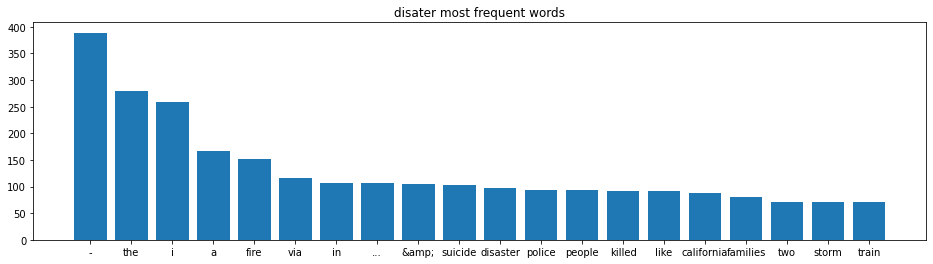

In [ ]:
d1=disaster_ngram_df[0][:20]
d2=disaster_ngram_df[1][:20]

d3=nondisaster_ngram_df[0][:20]
d4=nondisaster_ngram_df[1][:20]

plt.figure(figsize=(16,4))
plt.bar(d1,d2)
plt.title('disater most frequent words')


Text(0.5, 1.0, 'non disater most frequent words')

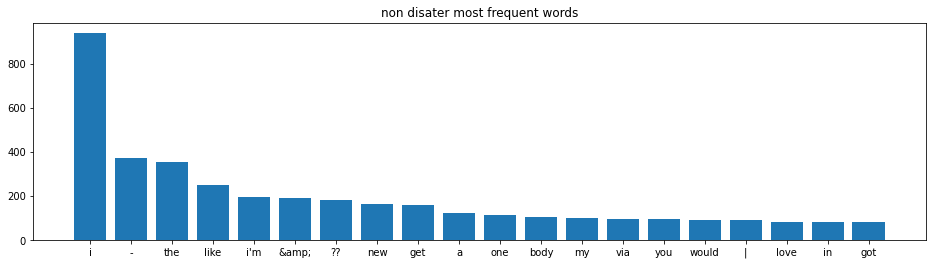

In [ ]:

plt.figure(figsize=(16,4))
plt.bar(d3,d4)
plt.title('non disater most frequent words')


Checking BIGRAMS in the whole corpus

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus,ngrams=(1,1),nr=None):
    vec=CountVectorizer(ngram_range=ngrams).fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_of_words=bag_of_words.sum(axis=0)
    word_freq=[(words,sum_of_words[0,idx]) for words ,idx in vec.vocabulary_.items() ]
    word_freq=sorted(word_freq,key=lambda x:x[1],reverse=True)

    return word_freq[:nr]


In [ ]:
top_n_grams=get_top_text_ngrams(data.text,(2,2),10)

In [ ]:
top_n_grams

[('http co', 4306),
 ('https co', 410),
 ('in the', 308),
 ('of the', 256),
 ('û_ http', 217),
 ('on the', 129),
 ('to the', 126),
 ('to be', 108),
 ('for the', 97),
 ('at the', 85)]

Text(0.5, 1.0, 'N gram plot of the whole dataset')

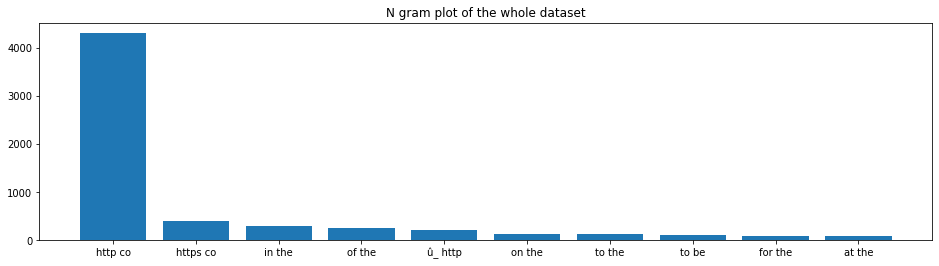

In [ ]:
x,y=zip(*top_n_grams)
plt.figure(figsize=(16,4))
plt.bar(x,y)
plt.title('N gram plot of the whole dataset')

Data Cleaning Explicity

In [ ]:
# create corpus for the individual categories

def create_corpus_of_target(data,target):
    corpus=[]
    for x in data[data['target']==target].text.str.split():
        for i in x:
            corpus.append(i)
    return corpus        

In [ ]:
corpus0=create_corpus_of_target(data,0)
corpus1=create_corpus_of_target(data,1)

Count StopWords

In [ ]:
stop=set(stopwords.words('english'))
d0=defaultdict(int)
for word in corpus0:
    if word in stop:
        d0[word]+=1

d1=defaultdict(int)
for word in corpus1:
    if word in stop:
        d1[word]+=1



In [ ]:
top0=sorted(d0.items(),key=lambda x:x[1],reverse=True)[:10]
top1=sorted(d1.items(),key=lambda x:x[1],reverse=True)[:10]


Text(0.5, 1.0, 'count of stopwords in Non diasater Dataset')

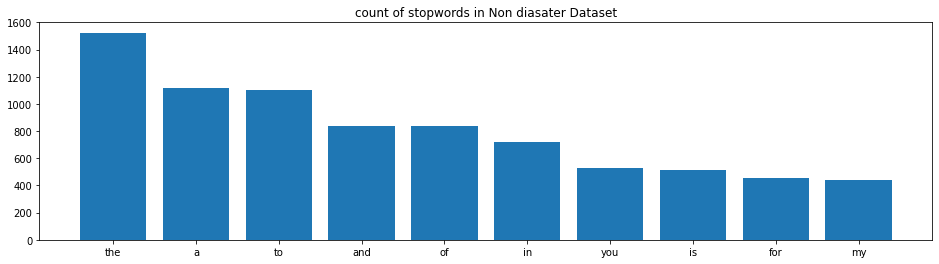

In [ ]:
x0,y0=zip(*top0)
plt.figure(figsize=(16,4))
plt.bar(x0,y0)
plt.title('count of stopwords in Non diasater Dataset')

Text(0.5, 1.0, 'count of stopwords in diasater Dataset')

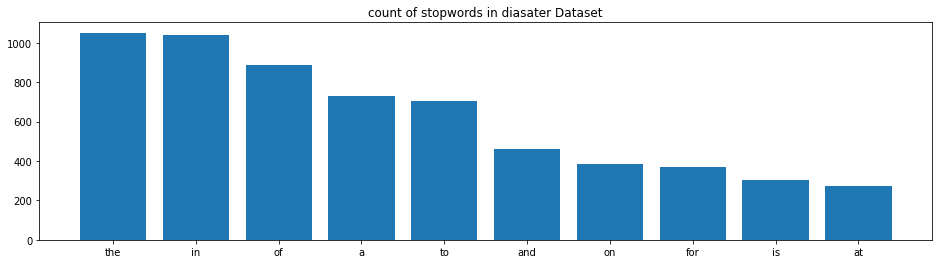

In [ ]:
x1,y1=zip(*top1)
plt.figure(figsize=(16,4))
plt.bar(x1,y1)
plt.title('count of stopwords in diasater Dataset')

Punctuation count

In [ ]:
import string
punc0=defaultdict(int)
for word in corpus0:
    if word in string.punctuation:
        punc0[word]+=1

punc1=defaultdict(int)
for word in string.punctuation:
    if word in string.punctuation:
        punc1[word]+=1


Text(0.5, 1.0, 'count of punctuations in Non diasater Dataset')

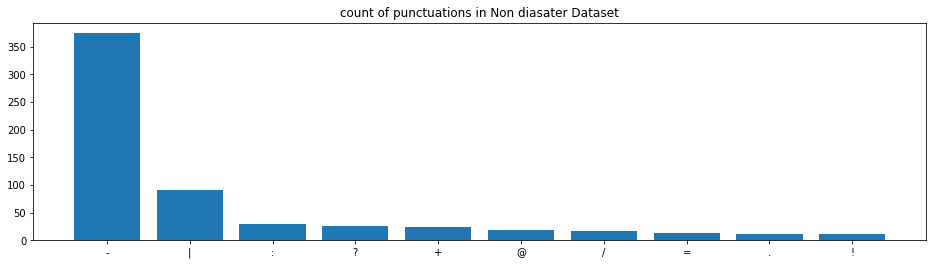

In [ ]:
top0=sorted(punc0.items(),key=lambda x:x[1],reverse=True)[:10]
top1=sorted(punc1.items(),key=lambda x:x[1],reverse=True)[:10]
x0,y0=zip(*top0)
plt.figure(figsize=(16,4))
plt.bar(x0,y0)
plt.title('count of punctuations in Non diasater Dataset')

Text(0.5, 1.0, 'count of punctuations in diasater Dataset')

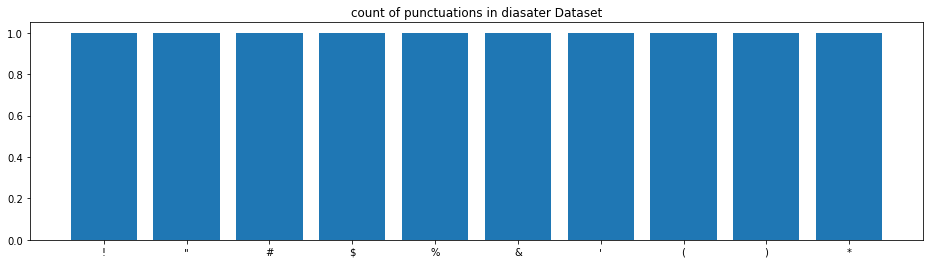

In [ ]:
top1=sorted(punc1.items(),key=lambda x:x[1],reverse=True)[:10]
#print(top1)
x1,y1=zip(*top1)
plt.figure(figsize=(16,4))
plt.bar(x1,y1)
plt.title('count of punctuations in diasater Dataset')

Remove http


In [ ]:
import re
def remove_http(text):
    text1=re.sub(r'http\S+', '', text)
    return text1

x='my name http/dgdh '
print(remove_http(x))    

my name  


Remove html

In [ ]:
import re

def cleanhtml(text):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', text)
  return cleantext


x = """<div>
<h1>Title</h1>
<p>A long text........ </p>
<a href=""> a link </a>
</div>"""
print(cleanhtml(x))      


Title
A long text........ 
 a link 



Remove Emojis

In [ ]:
import re

text = u'This is a smiley face \U0001f602'
print(text) # with emoji

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

print(deEmojify(text))

This is a smiley face 😂
This is a smiley face 


Remove Punctuations

In [ ]:
def remove_punc(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
x='my name is #$^&* TRJ@#KUM'
print(remove_punc(x))    

my name is  TRJKUM


In [ ]:
data['text']=data['text'].apply(lambda x: remove_http(x))
data['text']=data['text'].apply(lambda x: remove_punc(x))
data['text']=data['text'].apply(lambda x: deEmojify(x))
data['text']=data['text'].apply(lambda x: cleanhtml(x))


REmove Stopwords

In [ ]:

def remove_stopwords(text):
    text=[word.lower() for word in text.split() if word not  in stop]
    return " ".join(text)
x='my name is tejpal kumawat'
y=remove_stopwords(x)
y    


'name tejpal kumawat'

In [ ]:
data['text']=data['text'].apply(lambda x: remove_stopwords(x))
data.head()

,id,keyword,location,text,target,word count,text len,unique_words,mean_word_length,number of punctuations
0,1,NaN,NaN,our deeds reason earthquake may allah forgive us,1,13,69,13,4.384615,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1,7,38,7,4.571429,1
2,5,NaN,NaN,all residents asked shelter place notified off...,1,22,133,20,5.090909,3
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,8,65,8,7.125000,2
4,7,NaN,NaN,just got sent photo ruby alaska smoke wildfire...,1,16,88,15,4.500000,2


Visualize Word Cloud

In [ ]:
from wordcloud import WordCloud
corpus0=create_corpus_of_target(data,0)
corpus1=create_corpus_of_target(data,1)

word_cloud_corpus0=WordCloud(background_color='white',max_font_size=80).generate(' '.join(corpus0[:50]))


word_cloud_corpus1=WordCloud(background_color='white',max_font_size=80).generate(' '.join(corpus1[:50]))

Text(0.5, 1.0, 'WORDCLOUD FOR NONDISASTER DATA')

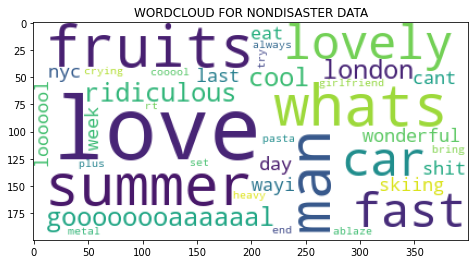

In [ ]:
plt.figure(figsize=(16,4))
plt.imshow(word_cloud_corpus0)
plt.title('WORDCLOUD FOR NONDISASTER DATA')

Text(0.5, 1.0, 'WORDCLOUD FOR DISASTER DATA')

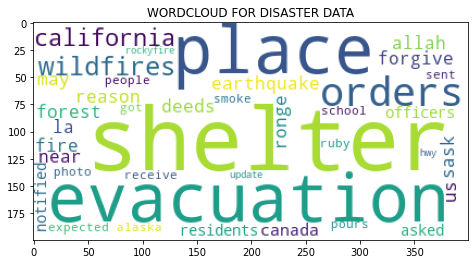

In [ ]:
plt.figure(figsize=(16,4))
plt.imshow(word_cloud_corpus1)
plt.title('WORDCLOUD FOR DISASTER DATA')

Stemming

In [ ]:

# import these modules 
from nltk.stem import WordNetLemmatizer 
lemmatizer=WordNetLemmatizer()
def lemmatizers(text):
    text1=[lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(text1)

In [ ]:
data['text']=data['text'].apply(lambda x: lemmatizers(x))
data.head()

,id,keyword,location,text,target,word count,text len,unique_words,mean_word_length,number of punctuations
0,1,NaN,NaN,our deed reason earthquake may allah forgive u,1,13,69,13,4.384615,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1,7,38,7,4.571429,1
2,5,NaN,NaN,all resident asked shelter place notified offi...,1,22,133,20,5.090909,3
3,6,NaN,NaN,13000 people receive wildfire evacuation order...,1,8,65,8,7.125000,2
4,7,NaN,NaN,just got sent photo ruby alaska smoke wildfire...,1,16,88,15,4.500000,2


In [ ]:
from wordcloud import WordCloud
corpus0=create_corpus_of_target(data,0)
corpus1=create_corpus_of_target(data,1)

word_cloud_corpus0=WordCloud(background_color='white',max_font_size=80).generate(' '.join(corpus0[:50]))


word_cloud_corpus1=WordCloud(background_color='white',max_font_size=80).generate(' '.join(corpus1[:50]))

Text(0.5, 1.0, 'WORDCLOUD FOR NONDISASTER DATA')

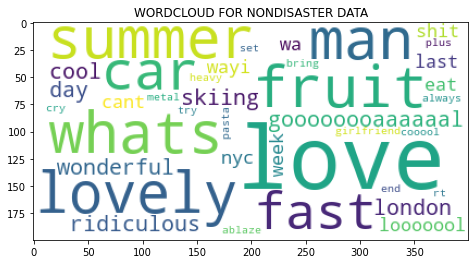

In [ ]:
plt.figure(figsize=(16,4))
plt.imshow(word_cloud_corpus0)
plt.title('WORDCLOUD FOR NONDISASTER DATA')

Text(0.5, 1.0, 'WORDCLOUD FOR DISASTER DATA')

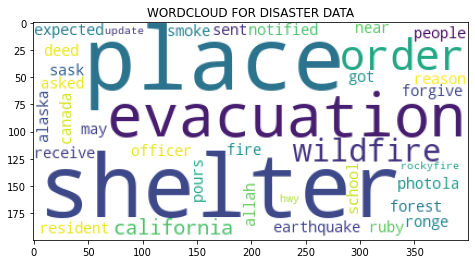

In [ ]:
plt.figure(figsize=(16,4))
plt.imshow(word_cloud_corpus1)
plt.title('WORDCLOUD FOR DISASTER DATA')

Bags Of Words implementation

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
def bag_of_words(data,ngrams=(1,1)):
    count_vectorizer=CountVectorizer(ngrams_range=ngram)
    emb=count_vectorizer.fit_transform(data)
    return emb,count_vectorizer
